CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

This is the template for the submission of Assignment 2. Keep the numbering, headings and sequence intact. Add the code and text answers (Markdown cells) below the respective numbered heading.

Student name: Moaz Mohamed

Student ID: A1779177

Initialise environment, libraries, settings, etc.:

In [1]:
# code here
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Load the data set:

In [2]:
# code here
from sklearn.datasets import load_breast_cancer
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
data_sk = load_breast_cancer()
data_DT = sklearn_to_df(data_sk)

# assign Benign as 0  and  Malignant as 1. so as ROC scoring fucntion can be used. 
# thats due to the inability of assigning pos_label to roc scoring function
#####################################################
data_DT['target'] = data_DT['target'].replace(1, 3)
data_DT['target'] = data_DT['target'].replace(0, 4)
data_DT['target'] = data_DT['target'].replace(3, 0)
data_DT['target'] = data_DT['target'].replace(4, 1)
#####################################################

data_SVM = data_DT.copy()
data_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

#### Answer: 


> radius =  mean of distances from centre to points on the perimeter

> texture  = standard deviation of Gray-scale values

> perimeter = perimeter of the cell
    
> area = area of the cell 

> smoothness  = local variation in radius lengths

> compactness =  (perimeter^2 / area)

> concavity =  severity of concave portions of the contour, or gathering information about the shape of the cell 
                 from concavity point of view. 

> concave points = number of concave portions of the contour instead of the magnitude.

> symmetry = measuring the difference between the perpendicular lines to the longest chord through 
               the centre the cell

> fractal dimension =  (“coastline approximation” - 1)
    
    
    
    
>> one of the possible reasons for using mean, error and maximum is due to the methodology of measurement.
using a combination of active contour model and an edge detector (Sobel). hence due to the limitation 
of the measurement technique adding mean, SE and max is crucial for an accurate representation 
of the nuclei cells.  
    


1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

In [3]:
# code here
df_mean = data_DT[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','target']]

df_error = data_DT[['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error','target']]

df_worst = data_DT [['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']]

# recast into long dataframe
df_mean_plot = df_mean.melt(['target'], var_name='cols',  value_name='vals')
df_error_plot = df_error.melt(['target'], var_name='cols',  value_name='vals')
df_worst_plot = df_worst.melt(['target'], var_name='cols',  value_name='vals')

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


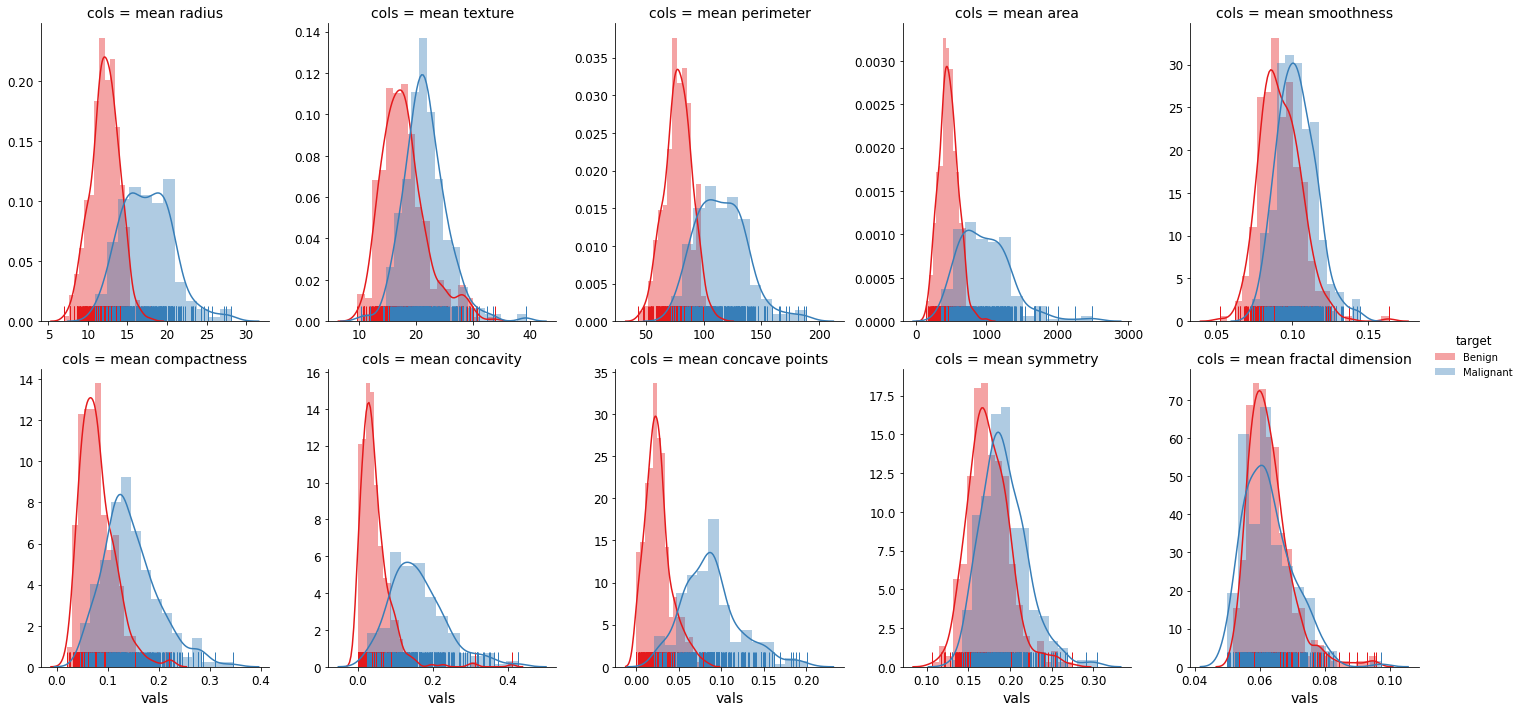

In [4]:
g_mean = sns.FacetGrid(df_mean_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5 , height=5, aspect=0.8)
g_mean = (g_mean.map(sns.distplot, "vals", hist=True, rug=True))
g_mean.add_legend(labels=['Benign','Malignant'])0

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


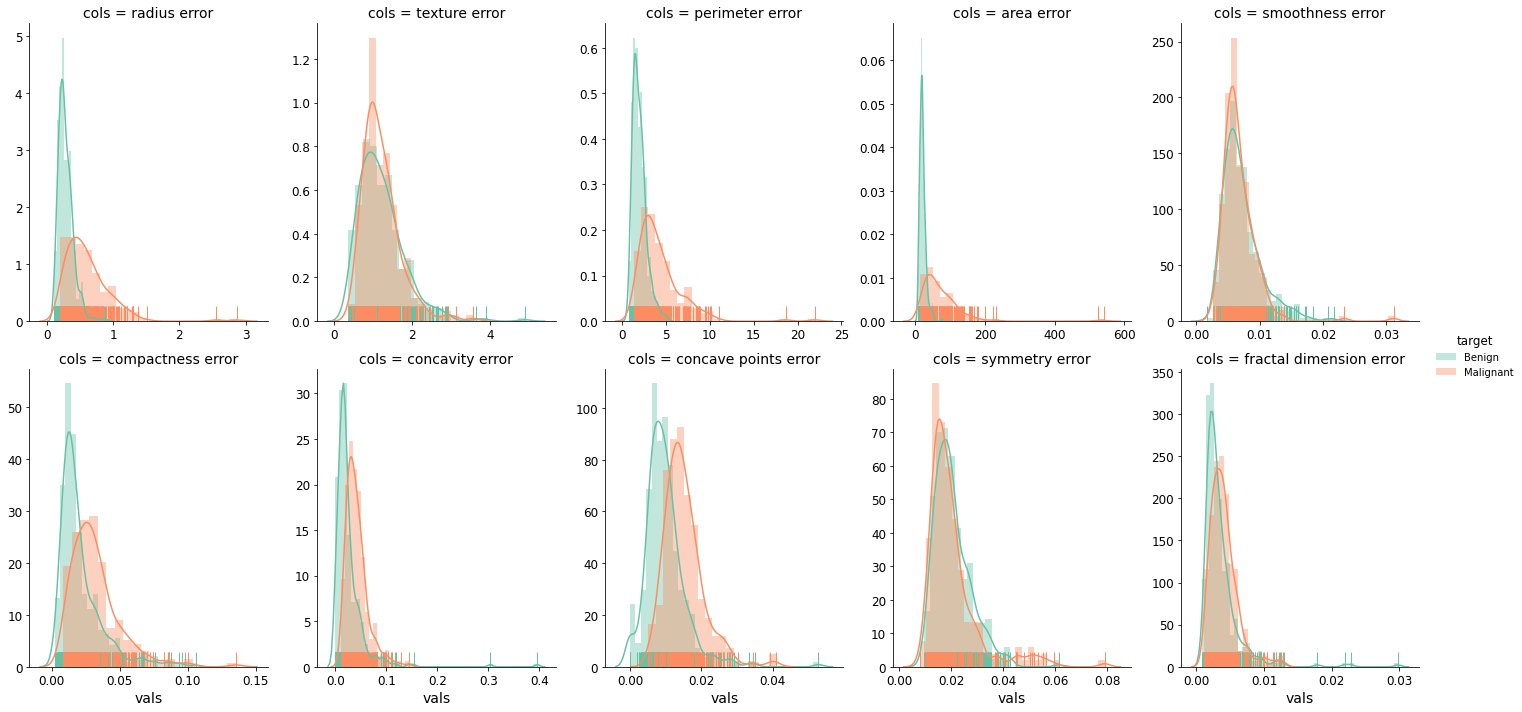

In [5]:
g_error = sns.FacetGrid(df_error_plot, col='cols', hue="target", palette="Set2",
                       sharex=False, sharey=False, col_wrap=5, height=5, aspect=0.8)
g_error = (g_error.map(sns.distplot, "vals", hist=True, rug=True))
g_error.add_legend(labels=['Benign','Malignant'])

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


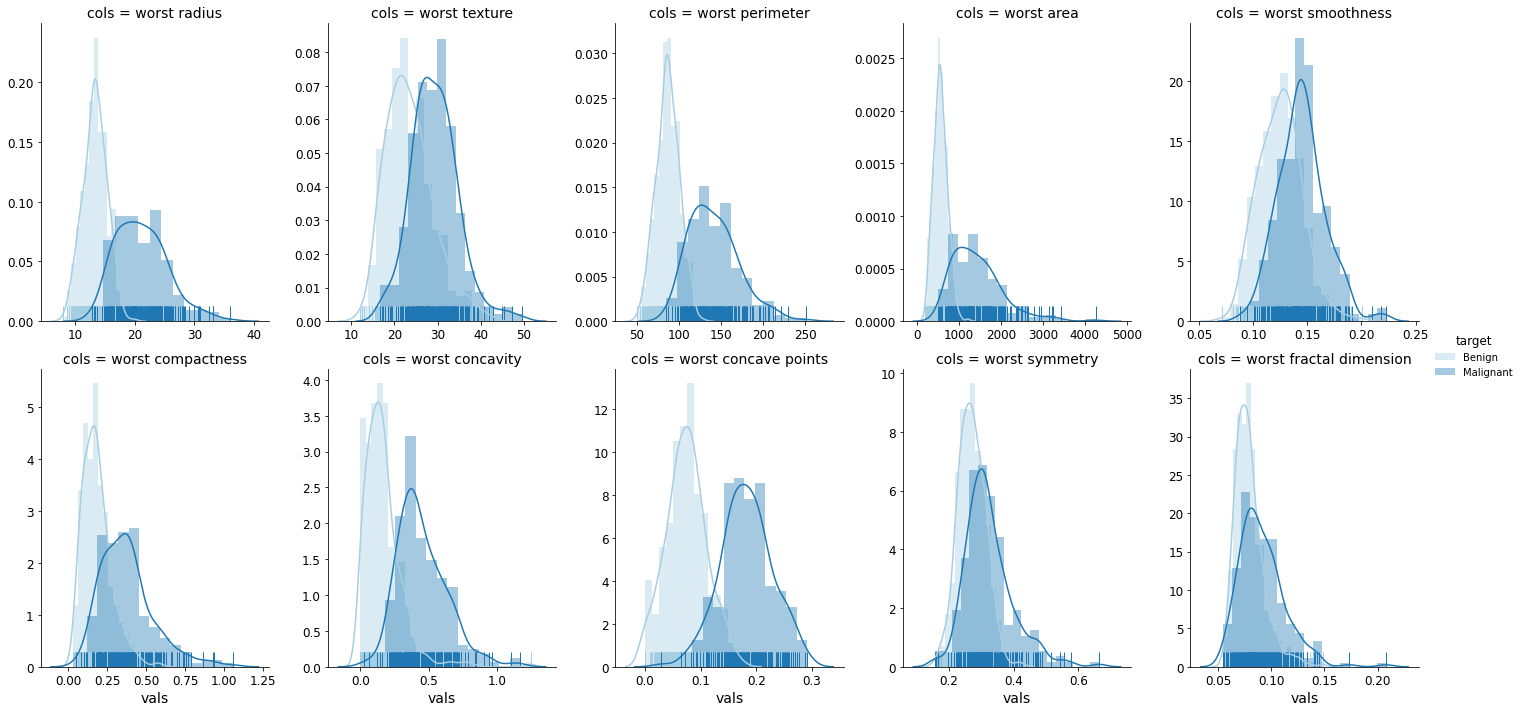

In [6]:
g_worst = sns.FacetGrid(df_worst_plot, col='cols', hue="target", palette="Paired",
                       sharex=False, sharey=False, col_wrap=5, height=5, aspect=0.8)
g_worst = (g_worst.map(sns.distplot, "vals", hist=True, rug=True))
g_worst.add_legend(labels=['Benign','Malignant'])

Answer:

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

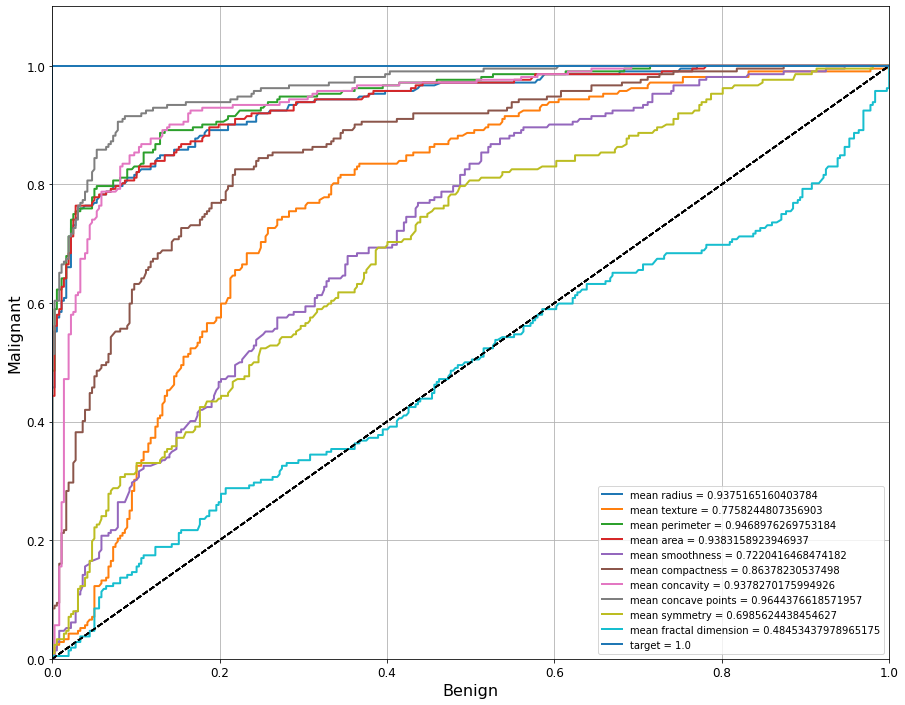

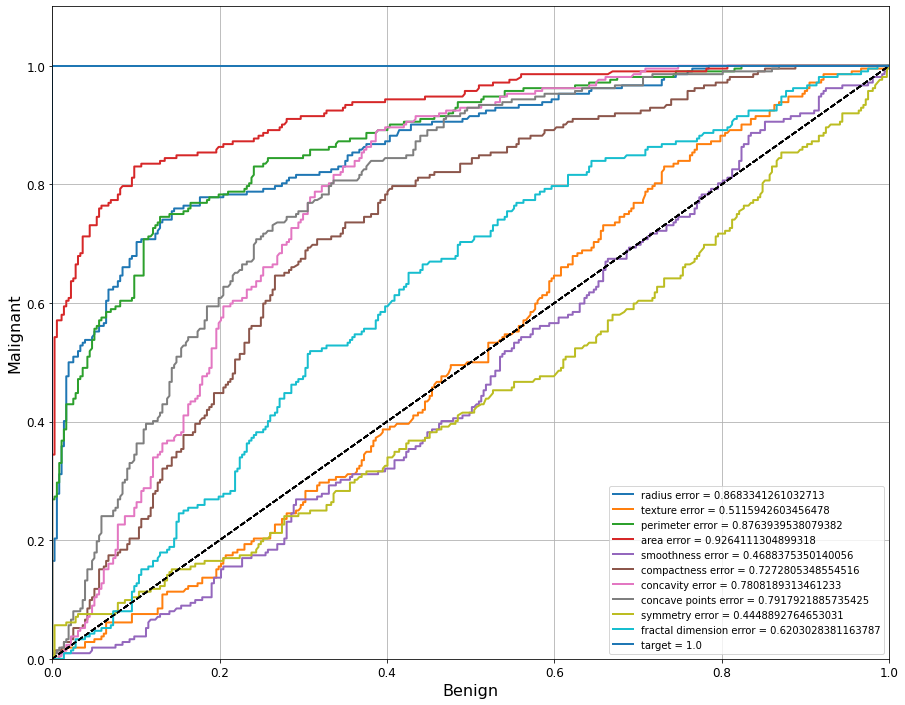

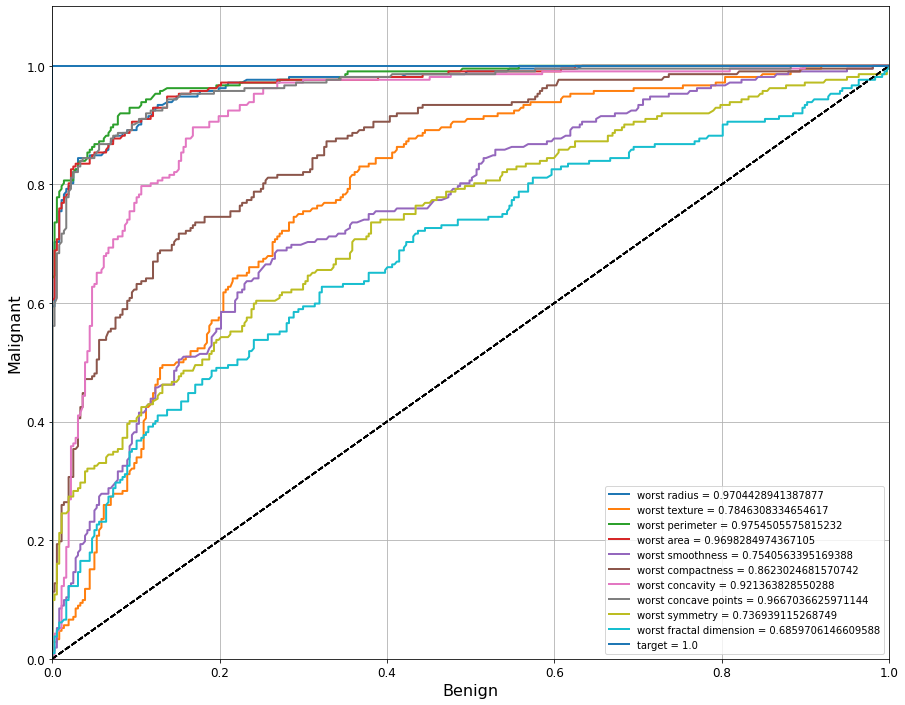

In [7]:
# code here
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label, df):
    roc_auc = roc_auc_score(df["target"], df[label])
    plt.plot(fpr, tpr, linewidth=2, label= label+" = " + str(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal # random guess
    plt.axis([0, 1, 0, 1.1])                                    
    plt.xlabel('Benign', fontsize=16) 
    plt.ylabel('Malignant', fontsize=16)  
    plt.legend()
    plt.grid(True)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_mean:
    fpr, tpr, thresholds = roc_curve(df_mean["target"], df_mean[i],pos_label= 1)
    plot_roc_curve(fpr, tpr, str(i),df_mean)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_error:
    fpr, tpr, thresholds = roc_curve(df_error["target"], df_error[i], pos_label= 1)
    plot_roc_curve(fpr, tpr, str(i),df_error)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_worst:
    fpr, tpr, thresholds = roc_curve(df_worst["target"], df_worst[i], pos_label= 1)
    plot_roc_curve(fpr, tpr, str(i),df_worst)


1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

>Answer: ( worst radius, worst perimeter, worst area, worst concave points, mean concave points )


> From the histograms: high separation between the two distributions is and indicative of a feature that can separate between the two classes 

>From the ROC curves: A higher ROC value corresponds to a better separation between the two class for every feature.
                     
                     
>Example : the worst area feature has a ROC value of 0.9698 and there is a clear separation between the two
distribution. 

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [8]:
# code here
M = data_DT[(data_DT['target'] != 0)].copy()
B = data_DT[(data_DT['target'] == 0)].copy()
malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point = (malignant_mean+benign_mean)/2

analysis_point_df = (pd.DataFrame(analysis_point)).T
analysis_point_df



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.804677,19.759834,96.720392,720.583306,0.097688,0.112636,0.103416,0.056854,0.183547,0.062774,...,17.257306,26.416639,114.188134,990.59288,0.134902,0.278748,0.308422,0.128341,0.296857,0.085486


2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [9]:
# code here
from sklearn.model_selection import train_test_split

X = data_DT.drop(columns = "target")
y = data_DT["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# dataframe of analysis point. the same rows/length as training set. 
ap_df_t = analysis_point_df
ap_df = pd.concat([ap_df_t]*len(X_train),ignore_index=True)

from sklearn.tree import DecisionTreeClassifier


DecisionTree = DecisionTreeClassifier(criterion='gini', random_state=0 ,
                class_weight="balanced",min_samples_split= 2)



### Answer:
> min_samples_split: default=2

> min_weight_fraction_leaf: default=0.0

>max_features: default=None >> using all features to decide the best split 

>max_leaf_nodes: default=None >> max number of leaf to be used is unlimited. 

> min_impurity_decrease: default=0.0 >> 

> min_impurity_split: default=0 >> has been deprecated in favor of  min_impurity_decrease. will be removed from sk 
version 0.25. 

>class_weight: balanced


2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [10]:
# code here

##### Answer

> Do the data need to be scaled for decision tree classification?  >> NO

> Are the different class sizes a problem? Yes 

> changed class_weight to balanced in order to counter the data unbalance

2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [11]:
# code here
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {'max_depth': [1,2, 4, 5, 6, 7, 8,9,10], 'min_samples_leaf': [1 ,2, 4, 5, 6]}]

grid_search = GridSearchCV(DecisionTree, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 4, 5, 6, 7, 8, 9, 10],
        

In [12]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

#### Answer:

> Due to the nonlinear nature of the data. DT will have to spread to higher depth in order to successfully reach a gini of 0. hence the range number of depth. the optimum min_samples_leaf 

3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

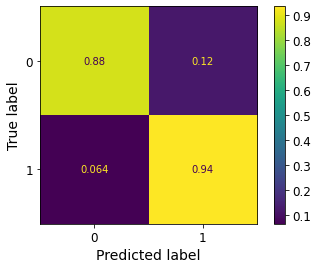

In [13]:
# code here
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
clf_DT = grid_search.best_estimator_
plot_confusion_matrix(clf_DT, X_test, y_test, normalize = "true")


In [14]:
y_pred = clf_DT.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))

              precision    recall  f1-score   support

      Benign       0.95      0.88      0.91        67
   Malignant       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



### Answer:
#### What is the chance of failing to detect a sample with cancer?
>> 6.4%
#### What are the strengths and weaknesses of the classifier?
#### Strengths: 
>> High recall ( sensitivity ) for malignant class, its a white box classier. the tree graph results are easy to interpret
#### Weaknesses: 
>> Relatively low precision to recall for malignant class, the classier depends on hard thresholds to constrict a decision boundary or make a prediction. high tendency to over fit. 

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

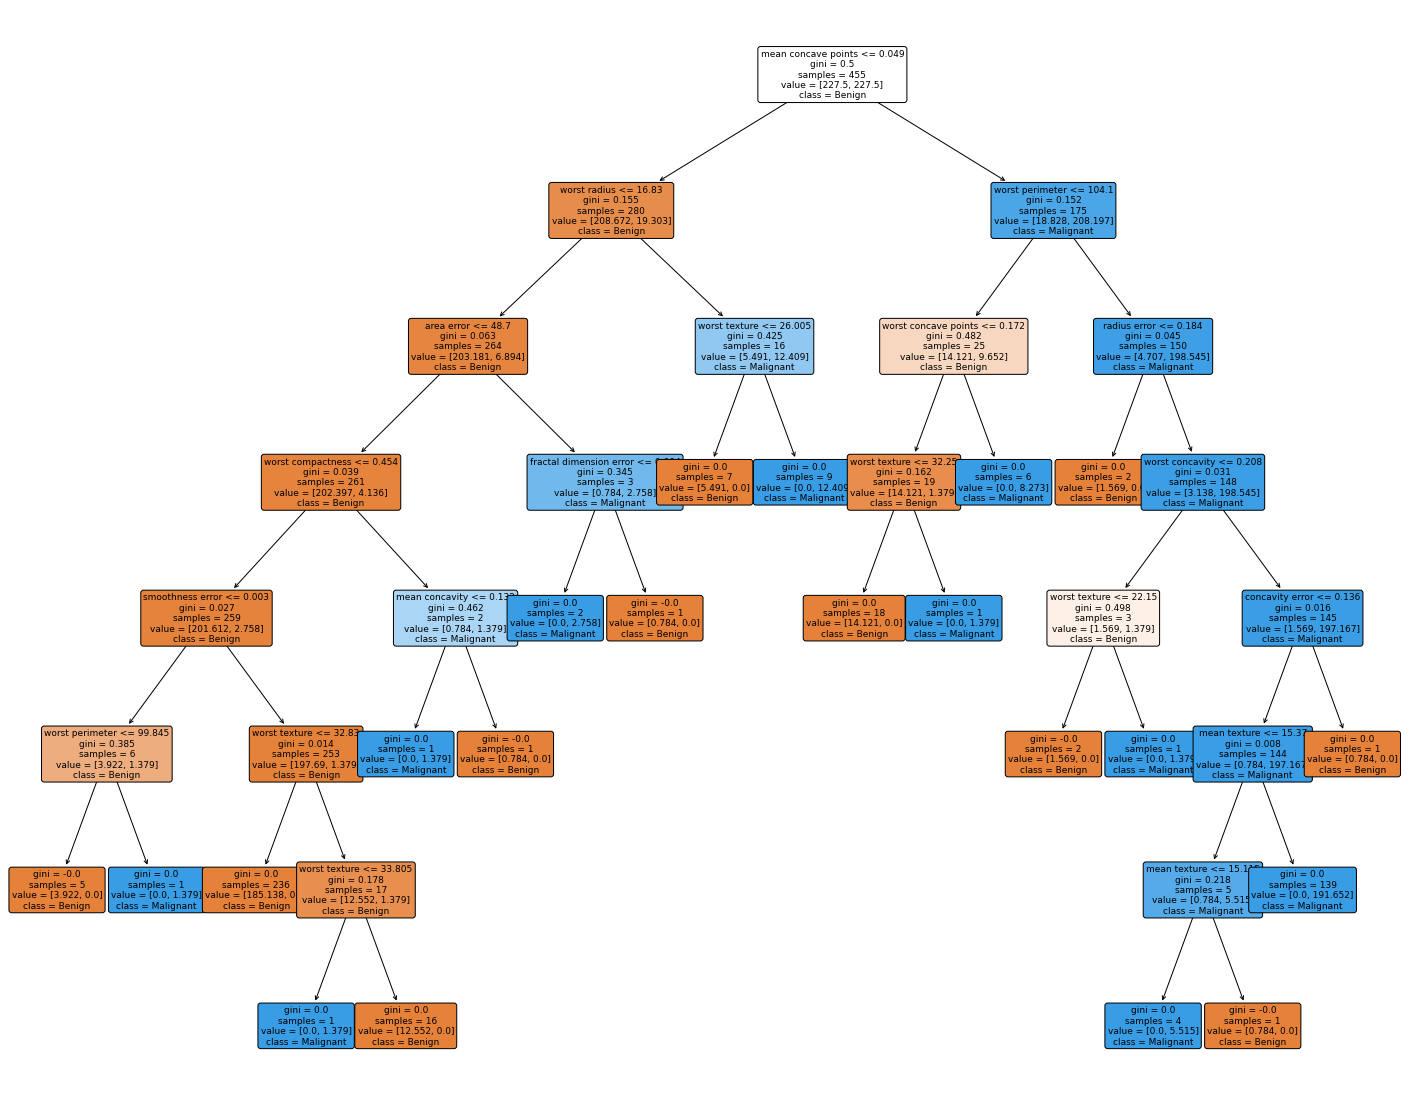

In [15]:
# code here
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))
a = plot_tree(clf_DT, 
              feature_names=data_sk.feature_names, 
              class_names=['Benign','Malignant'], 
              filled=True, 
              rounded=True, 
              fontsize=9)

##### Answer:
##### What do each of the entries in the first node mean?
> Feature >>> this node asks if the mean concave points are smaller or equal to 0.049. 

> Gini >>> measures impurity of the training samples. at root note 0.5 of the training samples doesn't belong to Benign class

> Samples >>> counts the training instances it applies that feature threshold to

> Values >>> class probabilities

> Class >>>  the predicted class

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [16]:
for i, t in zip(X_train.columns, clf_DT.feature_importances_):
    print(i,t)
    

mean radius 0.0
mean texture 0.006869220607661616
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0043956043956043704
mean concave points 0.6928809569304792
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.013264051217151573
texture error 0.0
perimeter error 0.0
area error 0.0176126911424634
smoothness error 0.0029094512518775726
compactness error 0.0
concavity error 0.006814989918654026
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.005369127516778488
worst radius 0.06324515391985928
worst texture 0.06299795132674983
worst perimeter 0.06993813315012293
worst area 0.0
worst smoothness 0.0
worst compactness 0.00732443542298831
worst concavity 0.007021177984885652
worst concave points 0.03935705521472375
worst symmetry 0.0
worst fractal dimension 0.0


In [17]:
 Top_5_features = ["mean concave points","worst radius","worst perimeter","worst texture","worst concave points"]

In [18]:
# code here
def train_vec(df, ap_df, feature_1, feature_2):
    X_train_plot = ap_df.copy()
    rr = len(X_train_plot.index)
    a = df[feature_1].to_numpy()
    b = df[feature_2].to_numpy()
    for col in df.columns:

        if col == feature_1:
            for i in range(0,rr):
                X_train_plot.at[i, col]= a[i]
                
        if col == feature_2:
            for i in range(0,rr):
                X_train_plot.at[i, col]= b[i]
         
    return X_train_plot


def make_meshgrid(X_train_plot, df,ap_df_t, h,feature_1, feature_2):
    
    df1 = pd.DataFrame(columns = df.columns)
    x_min, x_max = df[feature_1].min() - 0.09, df[feature_1].max() + 0.39
    y_min, y_max = df[feature_2].min() - 0.09, df[feature_2].max() + 0.39
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    a = xx.ravel()
    b = yy.ravel()
    df1 = pd.concat([ap_df_t]*len(a),ignore_index=True)
    
    for col in X_train_plot.columns:
            
        if col == feature_1:
            for i, a in zip(range(0,len(a)) , a):
                df1.at[i, col]= a
                
        if col == feature_2:  
            for i, b in zip(range(0,len(b)) , b):
                df1.at[i, col]= b
                    
    return df1, xx, yy

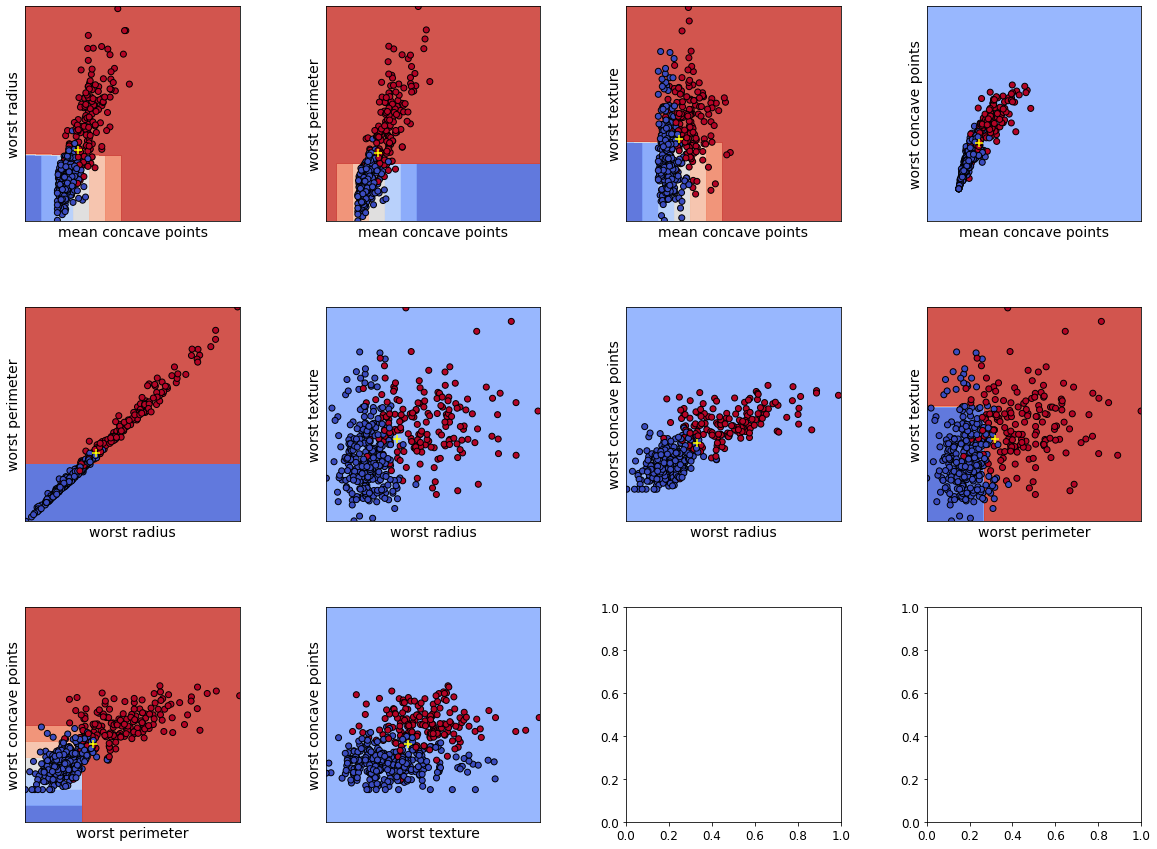

In [19]:
from itertools import combinations

fig, sub = plt.subplots(3,4, figsize=(20,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for combo, ax in zip(combinations(Top_5_features, 2), sub.flatten()):
    a = combo[0]
    b = combo[1]
    X_train_plot = train_vec(X_train, ap_df, a, b)
    X_train_plot_ready, xx, yy = make_meshgrid(X_train_plot, X_train,ap_df_t, 0.3,a , b)
    X0 = X_train_plot[a]
    X1 = X_train_plot[b]
    ######################################
#    printX_train_plot.head(-1))
#    print(X_train_plot_ready.head(-1))  
#     print("\n")
    # ignore just for debugging
    ######################################
    Z = clf_DT.predict(X_train_plot_ready)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.9)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm,  edgecolors='black')
    ax.scatter(analysis_point_df[a],analysis_point_df[b],s=60, marker= '+', c="yellow")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_xticks(())
    ax.set_yticks(())  
plt.show()

3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

#### Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern?

> Is the class differentiation well characterised by the node thresholds = no


>is it modelling the boundary using a rigid or stair case pattern = its modelling the boundary using rigid pattern


#### Why are there few 2D scatter plots with only one class shown as prediction contour?
> that's due a combination of two reasons. the first is the way Decision tree function. DT depends on hard thresholds and that's evident in the tree graph. the second reason is the analysis point at some feature combination is deviating from the hard threshold made by the DT. As a result the decision boundaries are not shown for few plots. 

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [20]:
# code here
from sklearn.svm import SVC

svm_clf = SVC(kernel="rbf", class_weight="balanced" , random_state=0, tol = 1e-2)

#### Answer
> tol: 1e-9 > Lower tolerance should help with our model perfomance. 

> class_weight: "‘balanced"

> max_iter: default=-1 > Since the dataset is small and the tolerance value isnt too low our model shouldnt take a long time to finish
                        

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [21]:
# code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_scale = Pipeline([('std_scaler', StandardScaler())])
data_SVM_scale_np = pipeline_scale.fit_transform(data_SVM)

data_SVM_scale_Pd = pd.DataFrame(data_SVM_scale_np, columns=data_SVM.columns, index=data_SVM.index)

M = data_SVM_scale_Pd[(data_SVM['target'] == 0)].copy()
B = data_SVM_scale_Pd[(data_SVM['target'] != 0)].copy()

malignant = M.drop(columns=['target'])
benign = B.drop(columns=['target'])
malignant_mean = malignant.mean()
benign_mean = benign.mean()
analysis_point_scaled = (malignant_mean+benign_mean)/2


analysis_point_df_scaled = (pd.DataFrame(analysis_point_scaled)).T



X_SVM = data_SVM_scale_Pd.drop(columns = "target")
y_SVM = data_SVM["target"]

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y_SVM, test_size=0.20, random_state=0)

ap_df_t_scaled = analysis_point_df_scaled
ap_df_scaled = pd.concat([ap_df_t_scaled]*len(X_train_SVM),ignore_index=True)

##### Answer

> Do the data need to be scaled for SV classification?  >> YES

> Are the different class sizes a problem? Yes 

> changed class_weight to balanced in order to counter the data unbalance

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [63]:
# code here

C_range = np.logspace(1, 9 , 30)
gamma_range = np.logspace(-4, 3, 30)

param_grid = dict(gamma=gamma_range, C=C_range)

grid_search_SVM = GridSearchCV(svm_clf, param_grid, cv=5,scoring='accuracy',
                           return_train_score=True,n_jobs=-1, verbose=1)

grid_search_SVM.fit(X_train_SVM, y_train_SVM)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4470 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=10.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma=0.004484204325419178, kernel='rbf',
                           max_iter=-1, probability=False, random_state=0,
                           shrinking=True, tol=0.01, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+01, 1...
       7.88046282e-02, 1.37382380e-01, 2.39502662e-01, 4.17531894e-01,
       7.27895384e-01, 1.26896100e+00, 2.21221629e+00, 3.85662042e+00,
       6.72335754e+00, 1.17210230e+01, 2.04335972e+01, 3.56224789e+01,
       6.21016942e+01, 1.08263673e+02, 1.88739182e+02, 3.29034456e+02,
       5.73615251e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [64]:
grid_search_SVM.best_params_

{'C': 10.0, 'gamma': 0.004893900918477494}

In [65]:
svm_clf = grid_search_SVM.best_estimator_

#### Answer:
##### Question: What is the rationale for your choice?
> The gamma parameter determines the sensitivity to outliers or how much influence outliers will have one the support vectors. 

>The "C" parameter determines the trade off between correct classification and having the largest margin between the two classes or data points between the two classes. for large C values a smaller margins will be accepted for the sake of accuracy. low values of C a bigger margins will be accepted but for a trade of with accuracy. 



> according to my data cloud of the my scatter plot. i ideally a model with low sensitivity to outliers and that can fit a large margin between the two class is preferred. so high gamma value and relatively low C value. but at the same time another way of thinking about this is: having low gamma values and high c values in this case "c" will act as a regularisation parameter

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

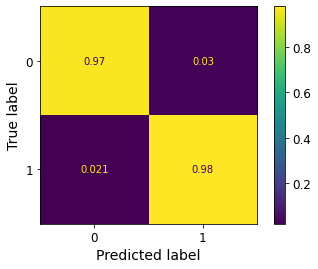

In [66]:
# code here
y_pred_SVM = svm_clf.predict(X_test_SVM)
plot_confusion_matrix(svm_clf, X_test_SVM, y_test_SVM,normalize = "true")

In [67]:
print(classification_report(y_test_SVM, y_pred_SVM, target_names=['Benign','Malignant']))AU
9+


              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98        67
   Malignant       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Answer:

#### What is the chance of failing to detect a sample with cancer? 
>2.1%

#### Strengths:
> High recall ( sensitivity ) for malignant class, same as the preceptron algorithm it takes advantage of the fact that in high dimensional space there is " almost always" a hyperplane that separates the data. 
#### Weaknesses: 
>black box classifier they are no intuitive ways in order to interpret the results of the classifier. SVM is sensitive to scale so re-scaling is required in almost all cases.

5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

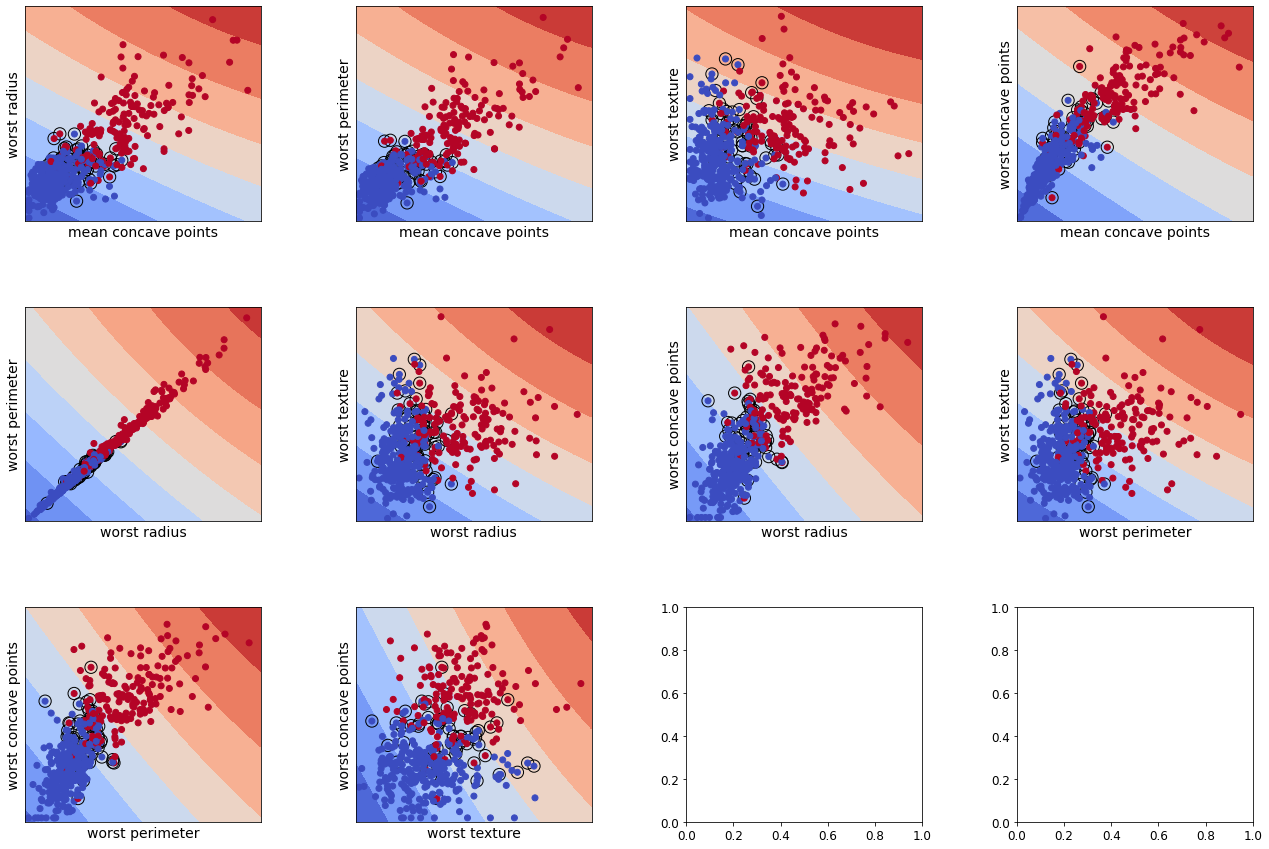

In [68]:
# code here
fig, sub = plt.subplots(3,4, figsize=(22,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for combo, ax in zip(combinations(Top_5_features, 2), sub.flatten()):
    a = combo[0]
    b = combo[1]
    a1 =(X_train_SVM.columns.get_loc(a))
    b1 =(X_train_SVM.columns.get_loc(b))
    X_train_plot_SVM = train_vec(X_train_SVM, ap_df_scaled, a, b)
    X_train_plot_ready_SVM, xx, yy = make_meshgrid(X_train_plot_SVM, X_train_SVM,ap_df_t_scaled, 0.1,a , b)
    X0 = X_train_plot_SVM[a]
    X1 = X_train_plot_SVM[b]
    #print(X_train_plot_ready.head(-1))
    #print("\n")
    Z = svm_clf.decision_function(X_train_plot_ready_SVM)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=1,cmap=plt.cm.coolwarm)
    ax.scatter(svm_clf.support_vectors_[:, a1],svm_clf.support_vectors_[:, b1],s=150, 
               linewidth=1, facecolors='None', edgecolors='k')
    ax.scatter(X0, X1, c=y_train_SVM, cmap=plt.cm.coolwarm) 
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_xticks(())
    ax.set_yticks(())  
plt.show()

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

#### Answer:
> Unlike the preceptron algorithm. SVM will try to find a large margin to separate the data. for preceptron 
as long as a hyperplane was found that separates the data then its job is done. but SVM will try to find the largest margin, hence the name "support vectors (SV)". in the diagram the SV are guiding the hyperplane with the optimum margin so that the hyperplane can separate both classes with the largest margin ( all that are subjected to a good hyper-parameters selection )

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer: 
> Decision tree(DT)

>> Classifier structure: DT follows a logical structure for predicting classes. A cart training algorithm is used to reach a gini criterion of zero 


>> Decision boundaries: Since DT depends on hard thresholds. at some parameter combinations the analysis points      deviates from the calculated threshold of some nodes. which resulted in no boundary being drawn. also DT boundary is model it by a rigid pattern indicative of the DT algorithm to over fit the data.


>> Similarities: High recall ( sensitivity ) for malignant class



>> Differences: White box classifier, makes little to no assumptions about the data.  




> Support vector Machines(SVM) 


>> Classifier structure: SVM fits a hyperplane that the separates the two classes. decision is determined by measuring if a data point is above or below the hyperplane. 


>> Decision boundaries: SVM fits a hyperplane that can separate the two classes with support vectors to approximate the perfect margin between the two classes that the hyperplane can set between them. 


>> Similarities: High recall ( sensitivity ) for malignant class


>> Differences: Black box classifier, sensitive to outliers



> how do the classifiers compare outside the areas of dense sampling in the parameter space? 
>> DT classifier does extrapolate according to the hard thresholds. Unlike SVM hence the classification depends on the decision function. the hyperplane exists at 0 and either classes exits at 1 or -1 of the decision function. its not really extrapolation as DT with its hard threshold.

6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

#### Answer: 

> For decision trees classifier makes no assumption about the datasets. also if the parameters are left to the default values the classifier will over-fit the data. that's almost guaranteed. but the more you tune the parameters in the DT classifier the more bias my tuning will introduce into the decision boundary. So initially you start with high variance but the more tuning/regularisation is introduced the more biased is introduced and ends with low variance. finding the sweet spot is tricky.


> similar can be said for SVM but since tuning c and gamma parameters can produce good results. tuning DT is harder due to the number of hyper-parameters that needs to be tuned. finding the right balance bias and variance is easier for SVM than DT but i am biased myself to svm so my opinions cant be treated as ground truths


6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer:

> DT classifier
>> the features used in the  are (mean concave points, worst radius, worst perimeter, worst texture and worst concave points) and resulted in accuracy of 85%

>SVM classifier

>> feature importance for SVM classifier cant be obtained but more than 3 hyperplanes have been used to reach an accuracy of 96%


> Research paper(SVM)

>> the features that resulted in the highest accuracy of 86.3% are ( mean texture, worst area, worst concavity and worst fractal dimension)



> with extensive research and ( trial and error ) the perfect combination of features can be found. but there is a pattern of similar combinations. usually a feature sets that have features with the following traits are promising. 

>> Good separation between the two distributions. 
>> less overlap between the two distributions. 
>> less spread 
>> high ROC score 

> features with the above traits are almost if not always present in the feature set. 